In [107]:
import pandas as pd
import numpy as np

In [108]:
df = pd.read_csv('jigsaw-toxic-comment-classification-challenge/train.csv')

In [128]:
df_test = pd.read_csv('test_cleaned.csv')

In [133]:
df_test = df_test.dropna()

In [130]:
len(df_test[df_test['toxic']==0])

89649

In [131]:
len(df_test[df_test['toxic']==1])

7671

In [134]:
len(df_test)

97320

In [96]:
import nltk
def count_identity_freq(id_terms,filename='jigsaw-toxic-comment-classification-challenge/train.csv'):
    df = pd.read_csv(filename)
    toxic_sent_counts = []
    toxic_id_freq = {}
    for w in id_terms:
        toxic_id_freq[w] = 0
    for i,r in df[df['toxic']==1].iterrows():
        text = nltk.word_tokenize(r['comment_text'].lower())
        sen = 0
        for w in text:
            if w in id_terms:
                toxic_id_freq[w] += 1
                sen+=1
        toxic_sent_counts.append(sen)
    print('Toxic analysis done')
    nontoxic_sent_counts = []
    nontoxic_id_freq = {}
    for w in id_terms:
        nontoxic_id_freq[w] = 0
    for i,r in df[df['toxic']==0].iterrows():
        text = nltk.word_tokenize(r['comment_text'].lower())
        sen = 0
        for w in text:
            if w in id_terms:
                nontoxic_id_freq[w] += 1
                sen+=1
        nontoxic_sent_counts.append(sen)
    print('Non toxic analysis done')
    return toxic_id_freq,toxic_sent_counts,nontoxic_id_freq,nontoxic_sent_counts

In [42]:
def read_id_file(filename='identity_words.txt',mode='train'):
    ids = []
    with open(filename) as f:
        for line in f:
            ids.append(line.strip())
    if mode == 'train':
        return ids[1:36]
    elif mode == 'test':
        return ids[37:]

In [97]:
ids = read_id_file(mode='train') + read_id_file(mode='test')

In [135]:
toxic_id_freq,toxic_sent_counts,nontoxic_id_freq,nontoxic_sent_counts = count_identity_freq(ids,filename='test_cleaned.csv')

Toxic analysis done
Non toxic analysis done


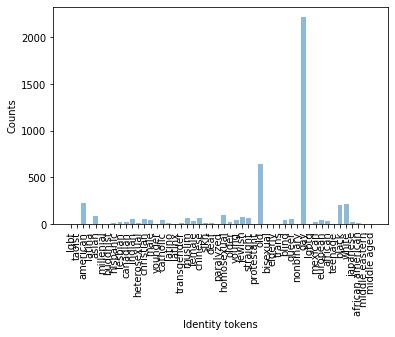

In [123]:
import matplotlib.pyplot as plt
import numpy as np
plt.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.4)
y_pos = np.arange(len(toxic_id_freq.keys()))
plt.bar(toxic_id_freq.keys(),toxic_id_freq.values(),align='center',alpha=0.5)
plt.xticks(y_pos,toxic_id_freq.keys(),rotation=90)
plt.xlabel('Identity tokens')
plt.ylabel('Counts')
plt.savefig('Train_Toxic_id_freq.png',bbox_inches = 'tight')

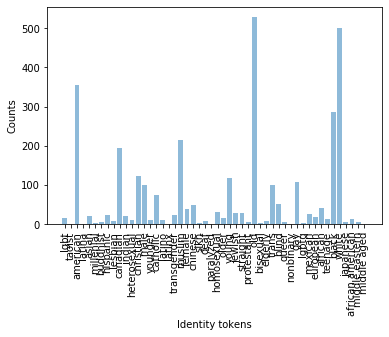

In [136]:
import matplotlib.pyplot as plt
import numpy as np
plt.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.4)
y_pos = np.arange(len(toxic_id_freq.keys()))
plt.bar(toxic_id_freq.keys(),toxic_id_freq.values(),align='center',alpha=0.5)
plt.xticks(y_pos,toxic_id_freq.keys(),rotation=90)
plt.xlabel('Identity tokens')
plt.ylabel('Counts')
plt.savefig('Test_Toxic_id_freq.png',bbox_inches = 'tight')

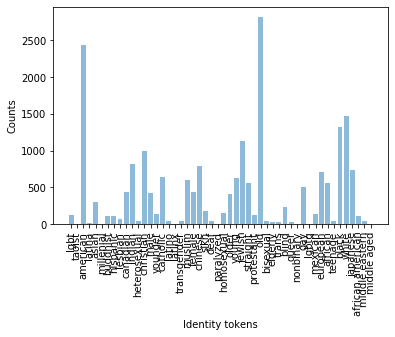

In [122]:
y_pos = np.arange(len(nontoxic_id_freq.keys()))
plt.bar(nontoxic_id_freq.keys(),nontoxic_id_freq.values(),align='center',alpha=0.5)
plt.xticks(y_pos,nontoxic_id_freq.keys(),rotation=90)
plt.xlabel('Identity tokens')
plt.ylabel('Counts')
plt.savefig('Train_nontoxic_id_freq.png',bbox_inches='tight')

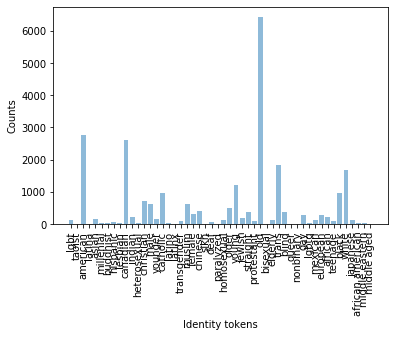

In [137]:
y_pos = np.arange(len(nontoxic_id_freq.keys()))
plt.bar(nontoxic_id_freq.keys(),nontoxic_id_freq.values(),align='center',alpha=0.5)
plt.xticks(y_pos,nontoxic_id_freq.keys(),rotation=90)
plt.xlabel('Identity tokens')
plt.ylabel('Counts')
plt.savefig('Test_nontoxic_id_freq.png',bbox_inches='tight')

In [83]:
def print_percent(toxic_id_freq,nontoxic_id_freq):
    toxic_sum = sum(toxic_id_freq.values())
    nontoxic_sum  =sum(nontoxic_id_freq.values())
    for x in toxic_id_freq:
        print(x,toxic_id_freq[x]/toxic_sum * 100, nontoxic_id_freq[x]/nontoxic_sum * 100)

In [124]:
print_percent(toxic_id_freq,nontoxic_id_freq)

lgbt 0.10888501742160278 0.6226892391515859
taoist 0.0 0.004864759680871765
american 4.943379790940767 11.865148861646235
latina 0.0 0.06324187585133295
asian 1.8074912891986064 1.4886164623467601
millenial 0.0 0.014594279042615295
buddhist 0.02177700348432056 0.5010702471297918
hispanic 0.32665505226480834 0.5010702471297918
lesbian 0.5226480836236934 0.3502626970227671
canadian 0.4790940766550522 2.1502237789453202
indian 1.1977351916376306 3.9988324576765906
heterosexual 0.13066202090592335 0.2091846662774859
christian 1.2195121951219512 4.859894921190893
male 0.9364111498257839 2.0383343062852695
younger 0.10888501742160278 0.6713368359603036
catholic 0.8928571428571428 3.0939871570344426
latino 0.17421602787456447 0.17513134851138354
latinx 0.0 0.0
transgender 0.2395470383275261 0.1799961081922553
muslim 1.4372822299651569 2.918855808523059
female 0.7839721254355401 2.091846662774859
chinese 1.3501742160278747 3.833430628526951
sikh 0.32665505226480834 0.8416034247908153
deaf 0.19

In [95]:
7,3,1,107,35,0

(7, 3, 1, 107, 35, 0)

In [120]:
toxic_id_freq['african american'] = 7
toxic_id_freq['middle eastern'] = 3
toxic_id_freq['middle aged'] = 1
nontoxic_id_freq['african american'] = 107
nontoxic_id_freq['middle eastern'] = 35
nontoxic_id_freq['middle aged'] = 0

In [121]:
toxic_id_freq

{'lgbt': 5,
 'taoist': 0,
 'american': 227,
 'latina': 0,
 'asian': 83,
 'millenial': 0,
 'buddhist': 1,
 'hispanic': 15,
 'lesbian': 24,
 'canadian': 22,
 'indian': 55,
 'heterosexual': 6,
 'christian': 56,
 'male': 43,
 'younger': 5,
 'catholic': 41,
 'latino': 8,
 'latinx': 0,
 'transgender': 11,
 'muslim': 66,
 'female': 36,
 'chinese': 62,
 'sikh': 15,
 'deaf': 9,
 'paralyzed': 0,
 'homosexual': 93,
 'older': 17,
 'young': 39,
 'jewish': 76,
 'straight': 62,
 'protestant': 3,
 'old': 646,
 'bisexual': 1,
 'elderly': 1,
 'trans': 2,
 'blind': 42,
 'queer': 53,
 'nonbinary': 0,
 'gay': 2218,
 'lgbtq': 1,
 'mexican': 24,
 'european': 40,
 'african': 29,
 'teenage': 5,
 'black': 201,
 'white': 211,
 'japanese': 27,
 'african american': 7,
 'middle eastern': 3,
 'middle aged': 1}

In [138]:
sorted(toxic_id_freq.items(),key=lambda x: x[1],reverse=True)

[('old', 529),
 ('white', 500),
 ('american', 354),
 ('black', 285),
 ('muslim', 214),
 ('canadian', 195),
 ('christian', 123),
 ('young', 117),
 ('gay', 108),
 ('male', 101),
 ('trans', 100),
 ('catholic', 74),
 ('blind', 51),
 ('chinese', 48),
 ('african', 41),
 ('female', 38),
 ('homosexual', 32),
 ('jewish', 28),
 ('straight', 27),
 ('mexican', 25),
 ('transgender', 23),
 ('hispanic', 22),
 ('asian', 21),
 ('indian', 20),
 ('european', 17),
 ('older', 16),
 ('lgbt', 15),
 ('african american', 13),
 ('teenage', 12),
 ('heterosexual', 11),
 ('younger', 10),
 ('latino', 10),
 ('lesbian', 8),
 ('deaf', 8),
 ('elderly', 8),
 ('queer', 5),
 ('japanese', 5),
 ('buddhist', 4),
 ('protestant', 4),
 ('middle eastern', 4),
 ('millenial', 2),
 ('sikh', 2),
 ('bisexual', 2),
 ('lgbtq', 2),
 ('middle aged', 1),
 ('taoist', 0),
 ('latina', 0),
 ('latinx', 0),
 ('paralyzed', 0),
 ('nonbinary', 0)]

In [139]:
sorted(nontoxic_id_freq.items(),key=lambda x: x[1],reverse=True)

[('old', 6428),
 ('american', 2773),
 ('canadian', 2608),
 ('trans', 1831),
 ('white', 1689),
 ('young', 1215),
 ('black', 973),
 ('catholic', 972),
 ('christian', 712),
 ('male', 637),
 ('muslim', 608),
 ('older', 506),
 ('chinese', 415),
 ('straight', 374),
 ('blind', 365),
 ('female', 321),
 ('european', 270),
 ('gay', 267),
 ('indian', 213),
 ('african', 207),
 ('jewish', 187),
 ('asian', 161),
 ('younger', 148),
 ('mexican', 132),
 ('japanese', 130),
 ('lgbt', 113),
 ('homosexual', 112),
 ('elderly', 111),
 ('transgender', 99),
 ('teenage', 97),
 ('protestant', 88),
 ('hispanic', 66),
 ('deaf', 49),
 ('heterosexual', 45),
 ('lgbtq', 41),
 ('latino', 36),
 ('african american', 34),
 ('middle eastern', 25),
 ('lesbian', 22),
 ('millenial', 20),
 ('buddhist', 20),
 ('sikh', 14),
 ('paralyzed', 11),
 ('queer', 8),
 ('middle aged', 6),
 ('latina', 5),
 ('bisexual', 2),
 ('latinx', 1),
 ('taoist', 0),
 ('nonbinary', 0)]